In [1]:
import io, time, json
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sklearn
from tensorflow.keras.utils import to_categorical
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# Grabbing the nominees
def retrieve_html(url):
    """
    Return the raw HTML at the specified URL.

    Args:
        url (string): 

    Returns:
        result: dict, movie name as key, movie information as value
    """
    # remember to use browser header here, or cannot retrieve full data from the website
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    response = requests.get(url, headers = headers)
    html = response.content
    soup = BeautifulSoup(html,'lxml')

    result = {}
    for item in soup.find_all('div', {'class':'result-subgroup subgroup-awardcategory-chron'}):
        try:
            award_title = item.find('div',{'class':'result-subgroup-title'}).find('a',{'class':'nominations-link'}).contents[0]
            if award_title == 'ACTRESS IN A LEADING ROLE':
                sub_groups = item.find_all('div',{'class':'result-details awards-result-actingorsimilar'})
                for sub in sub_groups:
                    sub_result = {}
                    film_title = sub.find('div',{'class':'awards-result-film-title'}).find('a',{'class':'nominations-link'}).contents[0]
                    is_winner = 1
                    actor = sub.find('div',{'class':'awards-result-nominationstatement'}).find('a',{'class':'nominations-link'}).contents[0]           
                    character = sub.find('div',{'class':'awards-result-character-name'}).contents[0].strip('{}"')
                    sub_result['film_title'] = film_title
                    sub_result['is_winner'] = is_winner
                    sub_result['actor'] = actor
                    sub_result['character'] = character
                    # sub_result['director'] = director
                    result[film_title] = sub_result
        except Exception:
            pass
    return result

In [3]:
# data of year 2016
best_2016 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:89,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

# data of year 2017
best_2017 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:90,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

# data of year 2018
best_2018 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:91,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

In [4]:
best_2016


{'Elle': {'film_title': 'Elle',
  'is_winner': 1,
  'actor': 'Isabelle Huppert',
  'character': 'Michèle'},
 'Loving': {'film_title': 'Loving',
  'is_winner': 1,
  'actor': 'Ruth Negga',
  'character': 'Mildred'},
 'Jackie': {'film_title': 'Jackie',
  'is_winner': 1,
  'actor': 'Natalie Portman',
  'character': 'Jackie Kennedy'},
 'La La Land': {'film_title': 'La La Land',
  'is_winner': 1,
  'actor': 'Emma Stone',
  'character': 'Mia'},
 'Florence Foster Jenkins': {'film_title': 'Florence Foster Jenkins',
  'is_winner': 1,
  'actor': 'Meryl Streep',
  'character': 'Florence Foster Jenkins'}}

In [5]:
# Load Data
import numpy as np
import pandas as pd
# read from award
df_awards = pd.read_csv('database.csv', skiprows = 1, names=['year','ceremony','award','winner','movieName','Nominis'])
df_movies = pd.read_csv('movies.csv')
df_credits = pd.read_csv('credits.csv')

In [6]:
#View data
#print(df_awards.head())
#print("")
#print(df_credits.head())

In [7]:
# append the data we scrapped to the df_awards
data = []
for k,v in best_2016.items():
    row = []
    row.append(['2016', 89, 'Best Actress', v['is_winner'], v['film_title'], v['actor']])
    data.append(row[0])
  
for k,v in best_2017.items():
    row = []
    row.append(['2017', 90, 'Best Actress', v['is_winner'], v['film_title'], v['actor']])
    data.append(row[0])

for k,v in best_2018.items():
    row = []
    row.append(['2018', 91, 'Best Actress', v['is_winner'], v['film_title'], v['actor']])
    data.append(row[0])
# pass the column name to the columns!!! Or there will be a runtime error
df_awards=df_awards.append(pd.DataFrame(data,columns=['year','ceremony','award','winner','movieName','Nominis']),ignore_index=True)

df_awards

,year,ceremony,award,winner,movieName,Nominis
0,1927/1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1927/1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1927/1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1927/1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1927/1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson
5,1927/1928,1,Art Direction,NaN,Rochus Gliese,Sunrise
6,1927/1928,1,Art Direction,1.0,William Cameron Menzies,The Dove; Tempest
7,1927/1928,1,Art Direction,NaN,Harry Oliver,7th Heaven
8,1927/1928,1,Cinematography,NaN,George Barnes,The Devil Dancer; The Magic Flame; Sadie Thompson
9,1927/1928,1,Cinematography,1.0,Charles Rosher,Sunrise


In [8]:
# Data Manipulation
#Joining the dataframes
if 'title' in df_credits.columns: 
  df_credits = df_credits.drop('title',axis=1) 
df_credits_movies = df_credits.set_index('movie_id').join(df_movies.set_index('id'))

In [9]:
#df_credits_movies.dtypes
# Reset the data types and get the earliest date of release_date
df_credits_movies['release_date'] = pd.to_datetime(df_credits_movies['release_date'])
#get the earliest release date from the dataset
min_year = min(df_credits_movies['release_date']) #1916-09-04
max_year = max(df_credits_movies['release_date']) #2017-02-03

In [10]:
# Select movies that are in Outstanding Picture or Best Picture awards category -> df_picture_awards
#join df_credits_movies and df_awards by movie name (df_credits_movies.title = df_awards.movieName)
#before that, extract BEST PICTRUE from the df_awards
df_actress_awards = df_awards.loc[df_awards['award'].isin(['Best Actress'])]
df_actress_awards.reset_index(drop = True, inplace = True)
df_credits_movies = df_credits_movies.loc[df_credits_movies['status'].isin(['Released'])]
df_actress_awards
df_credits_movies

,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
movie_id,,,,,,,,,,,,,,,,,,,,,
19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
559,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...",258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
38757,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...",260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,"[{""id"": 1562, ""n

In [11]:
# Replace all the null value in ‘winner’ column with 1
# df_picture_awards['winner'].isnull().sum()
df_actress_awards['winner'].fillna(1,inplace = True)
df_actress_awards

,year,ceremony,award,winner,movieName,Nominis
0,2016,89,Best Actress,1.0,Elle,Isabelle Huppert
1,2016,89,Best Actress,1.0,Loving,Ruth Negga
2,2016,89,Best Actress,1.0,Jackie,Natalie Portman
3,2016,89,Best Actress,1.0,La La Land,Emma Stone
4,2016,89,Best Actress,1.0,Florence Foster Jenkins,Meryl Streep
5,2017,90,Best Actress,1.0,The Shape of Water,Sally Hawkins
6,2017,90,Best Actress,1.0,"Three Billboards outside Ebbing, Missouri",Frances McDormand
7,2017,90,Best Actress,1.0,"I, Tonya",Margot Robbie
8,2017,90,Best Actress,1.0,Lady Bird,Saoirse Ronan
9,2017,90,Best Actress,1.0,The Post,Meryl Streep


In [12]:
# join df_picture_awards with df_credits_movies
#cleaning names/punctuation
import re
Actress = [re.sub(r'[^\w\s]','',x) for x in df_actress_awards['Nominis'].str.lower().str.strip().values]
df_actress_awards.loc[:,'Actress'] = Actress
df_credits_movies['Actress'] = df_credits_movies.cast.str.extract('({})'.format('|'.join(df_actress_awards['Nominis'])), expand=False)
df_credits_movies['Actress'] = df_credits_movies['Actress'].str.lower()
#df_credits_movies = df_credits_movies[df_credits_movies['Actress'].notnull()]
# for Actr in Actress:
#     #df_credits_movies["B"][df_credits_movies['A'].str.contains("BULL")] = "Long"
# #     df_credits_movies["Actress"][df_credits_movies['cast'].str.contains(Actr)] = Actr
# #     print(df_credits_movies['Actress'])
#     df_credits_movies["Actress"] = ifelse(grepl(Actr, df_credits_movies['cast'], ignore.case = T), Actr, "Other")

#print(filtered_df)
# check the dataframe, we can see the string in movie_title now is valid
print(df_actress_awards)
# print(df_credits_movies['Actress'])

    year  ceremony         award  winner  \
0   2016        89  Best Actress     1.0   
1   2016        89  Best Actress     1.0   
2   2016        89  Best Actress     1.0   
3   2016        89  Best Actress     1.0   
4   2016        89  Best Actress     1.0   
5   2017        90  Best Actress     1.0   
6   2017        90  Best Actress     1.0   
7   2017        90  Best Actress     1.0   
8   2017        90  Best Actress     1.0   
9   2017        90  Best Actress     1.0   
10  2018        91  Best Actress     1.0   
11  2018        91  Best Actress     1.0   
12  2018        91  Best Actress     1.0   
13  2018        91  Best Actress     1.0   
14  2018        91  Best Actress     1.0   

                                    movieName            Nominis  \
0                                        Elle   Isabelle Huppert   
1                                      Loving         Ruth Negga   
2                                      Jackie    Natalie Portman   
3                      

In [13]:
# join the two tables, merge the data
df = df_actress_awards.merge(df_credits_movies, left_on='Actress', right_on='Actress', how='right')
df = df.reset_index(drop=True)
#drop the columns from award table
df.drop('homepage',axis = 1, inplace = True)
df.drop('year',axis = 1, inplace = True)
df.drop('award',axis = 1, inplace = True)
df.drop('movieName',axis = 1, inplace = True)
df.drop('Nominis',axis = 1, inplace = True)
df.drop('ceremony',axis = 1, inplace = True)
df['winner'].fillna(0,inplace=True) #fill NA with 0
df
# Print master df to csv
df.to_csv('masterList.csv', index=False)

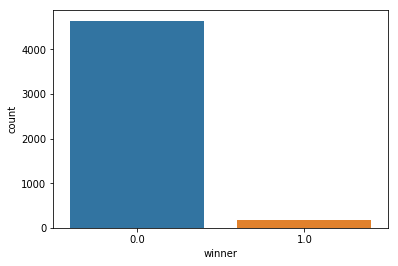

In [14]:
# We will choose the under-sampling by sampling from the 0-labeled data. 
# We need to first get a subset of nominated data, then sample from the non-nominated data, 
# and finally append the sampled data to the subset of nominated data.
sns.countplot(x='winner', data = df)


In [15]:
#Get the number of 0 labeled data, and the number of 1 labeled data
print(len(df.loc[df['winner'] == 0])) #4586
print(len(df.loc[df['winner'] == 1])) #209

4643
182


In [16]:
#balance the data
df_subset_0 = df.loc[df['winner'] == 0]
df_subset_1 = df.loc[df['winner'] == 1]

df_subset_0.drop('winner',axis=1,inplace=True)
df_subset_1.drop('winner',axis=1,inplace=True)

#sample with replacement
df_subset_0 = df_subset_0.sample(400) 
df_subset = pd.concat([df_subset_0,df_subset_1],ignore_index = True)
df_new = df_subset.merge(df_actress_awards, left_on = 'Actress', right_on = 'Actress', how = 'left')
df_new = df_new.fillna(0)

In [17]:
print(len(df_new))

642


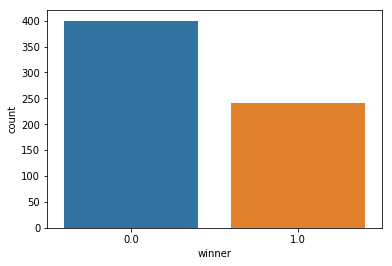

In [18]:
sns.countplot(x='winner', data = df_new)

In [19]:
#check number of null values in the dataset
df_new.isnull().sum()

Actress                 0
cast                    0
crew                    0
budget                  0
genres                  0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
year                    0
ceremony                0
award                   0
winner                  0
movieName               0
Nominis                 0
dtype: int64

In [20]:
#Exploratory Data Analysis

# check the data types and select numeric variables
df_new.dtypes

Actress                         object
cast                            object
crew                            object
budget                           int64
genres                          object
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
year                            object
ceremony                       float64
award                           object
winner                         float64
movieName                

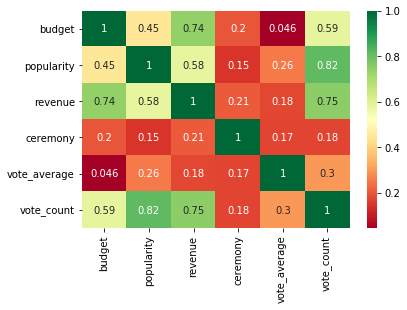

In [21]:
# correlation analysis
g = sns.heatmap(df_new[['budget','popularity','revenue','ceremony','vote_average','vote_count']].corr(),cmap='RdYlGn',annot=True)





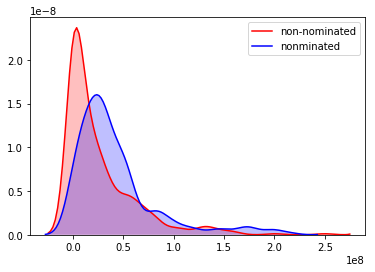

In [22]:
# Density Curve
# budget
budget0 = df_new[df_new['winner'] == 0]['budget']
budget1 = df_new[df_new['winner'] == 1]['budget']

g = sns.kdeplot(budget0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(budget1, legend = True, shade=True, color='b', label = 'nonminated')

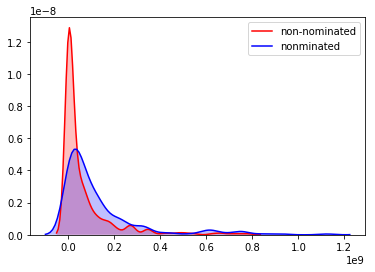

In [23]:
# revenue
# density curve
revenue0 = df_new[df_new['winner'] == 0]['revenue']
revenue1 = df_new[df_new['winner'] == 1]['revenue']

g = sns.kdeplot(revenue0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(revenue1, legend = True, shade=True, color='b', label = 'nonminated')

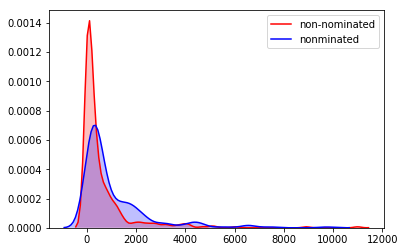

In [24]:
# vote count
vc0 = df_new[df_new['winner'] == 0]['vote_count']
vc1 = df_new[df_new['winner'] == 1]['vote_count']

g = sns.kdeplot(vc0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(vc1, legend = True, shade=True, color='b', label = 'nonminated')

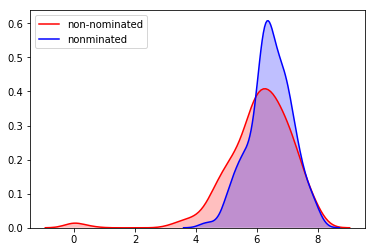

In [25]:
# vote average
va0 = df_new[df_new['winner'] == 0]['vote_average']
va1 = df_new[df_new['winner'] == 1]['vote_average']

g = sns.kdeplot(va0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(va1, legend = True, shade=True, color='b', label = 'nonminated')

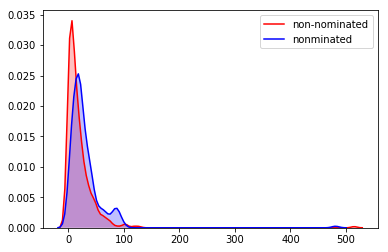

In [26]:
# popularity
popularity0 = df_new[df_new['winner'] == 0]['popularity']
popularity1 = df_new[df_new['winner'] == 1]['popularity']

g = sns.kdeplot(popularity0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(popularity1, legend = True, shade=True, color='b', label = 'nonminated')

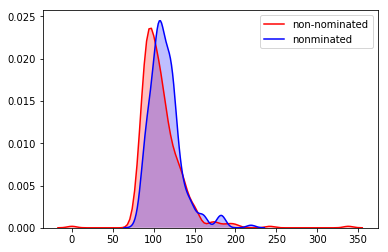

In [27]:
#runtime
runtime0 = df_new[df_new['winner'] == 0]['runtime']
runtime1 = df_new[df_new['winner'] == 1]['runtime']

g = sns.kdeplot(runtime0, legend = True, shade=True, color='r', label = 'non-nominated')
g = sns.kdeplot(runtime1, legend = True, shade=True, color='b', label = 'nonminated')

In [28]:
#genres
#clean the data
genres_name0 = {}
genres_name1 = {}
genres_set = set()
for i in range(len(df_new)):
    genres = json.loads(df_new.loc[i,'genres'])
    for it in genres:
        genres_set.add(it['name'])
        if df_new.loc[i,'winner'] == 0:
            if it['name'] not in genres_name0:
                genres_name0[it['name']] = 1
            else:
                genres_name0[it['name']] += 1
        if df_new.loc[i,'winner'] == 1:
            if it['name'] not in genres_name1:
                genres_name1[it['name']] = 1
            else:
                genres_name1[it['name']] += 1

genres_array0=[]
genres_array1=[]
for g in genres_set:
    if g in genres_name0:
        genres_array0.append(genres_name0[g])
    else:
        genres_array0.append(0)
    if g in genres_name1:
        genres_array1.append(genres_name1[g])
    else:
        genres_array1.append(0)


        
genres_all = []
genres_all.append(np.array(genres_array0)/sum(genres_array0))
genres_all.append(np.array(genres_array1)/sum(genres_array1))

In [29]:
df_genres = pd.DataFrame(genres_all, columns=list(genres_set))
print(df_genres.head())

   Animation  Documentary     Music    Comedy    Horror       War   Fantasy  \
0   0.017358     0.007715  0.017358  0.127290  0.047252  0.005786  0.032787   
1   0.021959     0.000000  0.020270  0.199324  0.005068  0.008446  0.043919   

   Science Fiction   Foreign     Crime   Mystery  Thriller   Western  \
0         0.037608  0.001929  0.075217  0.043394  0.122469  0.006750   
1         0.035473  0.000000  0.047297  0.021959  0.052365  0.010135   

    History    Family    Action     Drama  Adventure   Romance  
0  0.018322  0.034716  0.097396  0.190935   0.052073  0.063645  
1  0.016892  0.033784  0.065878  0.244932   0.069257  0.103041  


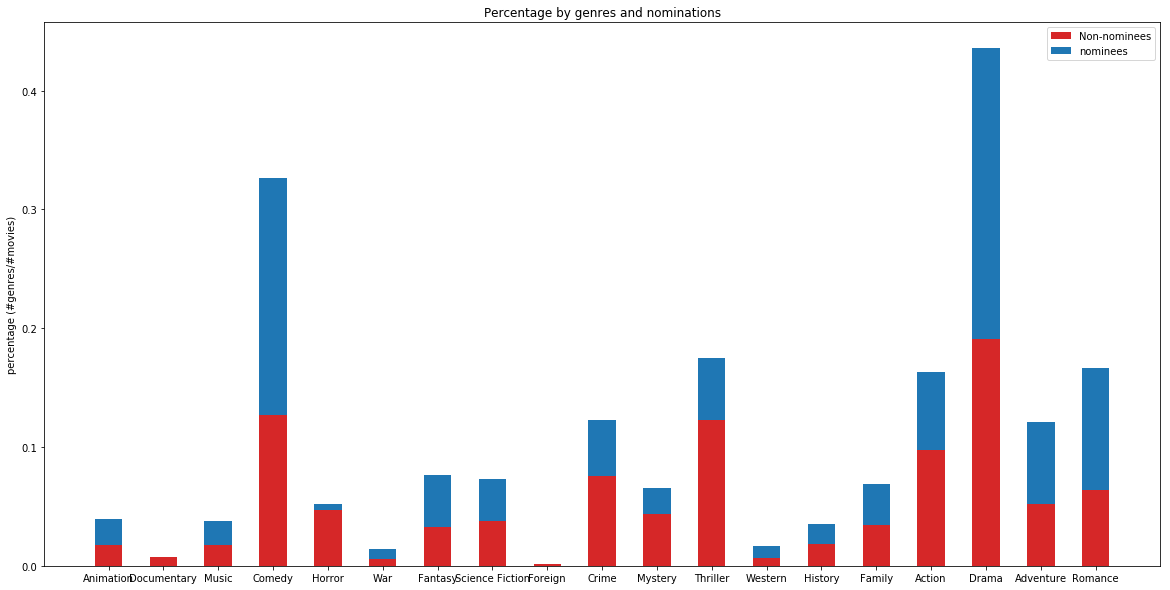

In [30]:
# draw stacked bar chart
N = len(df_genres.columns)
ind = np.arange(N)
width = 0.5

plt.figure(figsize=(20,10))
p1 = plt.bar(ind, df_genres.loc[[0]].values[0], width, color='#d62728')
p2 = plt.bar(ind, df_genres.loc[[1]].values[0], width, bottom=df_genres.loc[[0]].values[0])

plt.ylabel('percentage (#genres/#movies)')
plt.title('Percentage by genres and nominations')
plt.xticks(ind,df_genres.columns)
plt.legend((p1[0],p2[0]),('Non-nominees','nominees'))

In [31]:
# Feature Engineering
# Since many columns such as “crew”, “cast” contain information in json format, we need to extract useful information from the columns and then perform one hot encoding.
# We will transform our dataset into a all numeric matrix so that we can feed the data into our machine learning model.
# To look at the structure of column (eg.”cast”), we can use: df.loc[0,’cast’]
import json
def feature_engineering(column_name, df, json_name):
    """
    Args:
        column_name: the column name in the dataframe that contains a json file that needs to conduct feature engineering on
        df: dataframe that perform feature engineering on
        json_name: name in the json file that we want to extract
    
    Returns: new dataframe after feature engineering
    """
    
    name = {}

    for item in df[column_name]:
        group = json.loads(item)
        for it in group:
            if it[json_name] not in name:
                name[it[json_name]] = 1
            else:
                name[it[json_name]] += 1
    
    final = {}
    index = 0
    for k,v in name.items():
        if v > 1:
            final[k] = index
            index += 1
    np_item = np.zeros((len(df),len(final)))
    item_dict = {}
    row = 0
    for item in df[column_name]:
        group = json.loads(item)
        for it in group:
            if it[json_name] in final:
                index = final[it[json_name]]
                np_item[row][index] = 1
        row += 1

    df_item = pd.DataFrame(np_item, columns = list(final.keys()))
    df_output = pd.concat([df,df_item],axis = 1)
    
    return df_output

In [32]:
df2 = feature_engineering("cast", df_new, "name")
df2 = df2.drop('cast', axis = 1) #drop the column after feature engineering
df2

,Actress,crew,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,...,Chaunty Spillane,Matt LeBlanc,Crispin Glover,Gary Weeks,Steve Mallory,Steve Little,Ben Falcone,Ellie Kemper,Annie Mumolo,Mia Rose Frampton
0,0,"[{""credit_id"": ""52fe4507c3a36847f80b81d5"", ""de...",40000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...","[{""id"": 4776, ""name"": ""race against time""}, {""...",en,FearDotCom,"With four corpses on his hands, New York City ...",6.756886,"[{""name"": ""Milagro Films"", ""id"": 1070}, {""name...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,"[{""credit_id"": ""52fe422fc3a36847f800aa4b"", ""de...",35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,"[{""credit_id"": ""56696620c3a36836b4005212"", ""de...",23000000,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n...","[{""id"": 240, ""name"": ""underdog""}, {""id"": 271, ...",en,Step Up 2: The Streets,When rebellious street dancer Andie lands at t...,28.973074,"[{""name"": ""Summit Entertainment"", ""id"": 491}, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,"[{""credit_id"": ""52fe426fc3a36847f801e775"", ""de...",40000000,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 53, ""...","[{""id"": 516, ""name"": ""child abuse""}, {""id"": 13...",en,The Sixth Sense,A psychological thriller about an eight year o...,73.085576,"[{""name"": ""Spyglass Entertainment"", ""id"": 158}...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,"[{""credit_id"": ""52fe46d49251416c75084ec9"", ""de...",0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 14, ""nam...","[{""id"": 9725, ""name"": ""sword fight""}, {""id"": 1...",en,The Beastmaster,"Dar, is the son of a king, who is hunted by a ...",6.377523,"[{""name"": ""Antares Produzione Cinematografica""...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,"[{""credit_id"": ""536da61c0e0a2647d400eced"", ""de...",0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...","[{""id"": 4565, ""name"": ""dystopia""}]",en,Megiddo: The Omega Code 2,Stone (the Antichrist) becomes President of th...,0.809588,"[{""name"": ""Infinity Omnimedia"", ""id"": 5044}, {...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,"[{""credit_id"": ""52fe4243c3a36847f8010b11"", ""de...",0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...","[{""id"": 30, ""name"": ""individual""}, {""id"": 242,...",es,"María, llena eres de gracia",A pregnant Colombian teenager becomes a drug m...,3.027892,"[{""name"": ""Fine Line Features"", ""id"": 8}, {""na...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,"[{""credit_id"": ""54afbbdc9251413fe1001ac6"", ""de...",70000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 2805, ""name"": ""rocky mountains""}, {""id...",en,Cliffhanger,"A year after losing his friend in a tragic 4,0...",26.199090,"[{""name"": ""TriStar Pictures"", ""id"": 559}, {""na...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,"[{""credit_id"": ""52fe426fc3a36847f801e37d"", ""de...",7000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 128, ""name"": ""love triangle""}, {""id"": ...",en,The Piano,"After a long voyage from Scotland, pianist Ada...",17.681707,"[{""name"": ""New South Wales Film & Television O...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,"[{""credit_id"": ""54afed0cc3a3683fba00443d"", ""de...",26000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...","[{""id"": 3667, ""name"": ""time""}, {""id"": 3800, ""n...",en,Clockstoppers,"Until now, Zak Gibbs' greatest challenge has b...",5.894163,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# director
cast_name = {}

for item in df2['Actress']:
    if item not in cast_name:
        cast_name[item] = 1
    else:
        cast_name[item]+=1


# set the appear tims for actors
final_crew = {}
index = 0
for k,v in cast_name.items():
    if v > 0:
        final_crew[k] = index
        index += 1
# print(len(final_crew))

np_crew = np.zeros((len(df2), len(final_crew)))
row = 0
for item in df2['Actress']:
    if item not in final_crew:
        index = final_crew[item]
        np_crew[row][index] = 1
    else:
        cast_name[item]+=1
    row += 1

df_crew = pd.DataFrame(np_crew, columns = list(final_crew.keys()))
            
df3 = pd.concat([df2, df_crew], axis = 1)
# print(df.shape)

In [34]:
# df_clean = df3
df3=df3.drop(['crew'],axis=1)
genres
df4 = feature_engineering("genres", df3, "name")
df4 = df4.drop(['genres'], axis = 1)
#keywords
df5 = feature_engineering('keywords', df4, 'name')
df5 = df5.drop(['keywords'], axis = 1)
#production_companies
df6 = feature_engineering('production_companies',df5,'name')
df6 = df6.drop(['production_companies'],axis=1)
#production_countries
df7 = feature_engineering('production_countries',df6,'name')
df7 = df7.drop(['production_countries'],axis=1)
#spoken_languages
df8 = feature_engineering('spoken_languages',df7,'iso_639_1')
df8 = df8.drop(['spoken_languages'],axis=1)

# # drop the columns not used
# df8
#df_clean = df8.drop(["movie_title","original_title","overview","tagline",'title','original_language','status','release_date','movieName','filmInfo','award'],axis=1)

In [35]:
list(df8)

['Actress',
 'budget',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'release_date',
 'revenue',
 'runtime',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'year',
 'ceremony',
 'award',
 'winner',
 'movieName',
 'Nominis',
 'Stephen Dorff',
 'Stephen Rea',
 'Udo Kier',
 'Anna Thalbach',
 'Birthe Wolter',
 'Jack Nicholson',
 'Michael Keaton',
 'Kim Basinger',
 'Michael Gough',
 'Pat Hingle',
 'Tracey Walter',
 'Robert Wuhl',
 'Christopher Fairbank',
 'Harry Shum Jr.',
 'Channing Tatum',
 'Bruce Willis',
 'Toni Collette',
 'Olivia Williams',
 'Haley Joel Osment',
 'Donnie Wahlberg',
 'KaDee Strickland',
 'Patrick McDade',
 'Tony Michael Donnelly',
 'Bob Bowersox',
 'Mark Falvo',
 'Marc Singer',
 'Rip Torn',
 'Michael Biehn',
 'Diane Venora',
 'Chad Michael Murray',
 'John DeMita',
 'Catalina Sandino Moreno',
 'Sylvester Stallone',
 'John Lithgow',
 'Michael Rooker',
 'Rex Linn',
 'Caroline Goodall',
 'Gregory Scott Cummins',
 'Paul Winfield',
 

In [36]:
df_clean = df8.drop([
 'original_title',
    'status',
 'tagline',
 'title',
 'overview',
 'runtime',
 'ceremony',
 'award'],axis=1)

df_clean.head()

,Actress,budget,original_language,popularity,release_date,revenue,vote_average,vote_count,year,winner,...,sv,hu,th,vi,he,pt,el,ko,sw,no
0,0,40000000,en,6.756886,2002-08-09,18902015,3.2,105,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,35000000,en,44.104469,1989-06-23,411348924,7.0,2096,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,23000000,en,28.973074,2008-02-14,150816700,6.5,640,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,40000000,en,73.085576,1999-08-06,672806292,7.7,3147,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,en,6.377523,1982-08-20,14056528,6.0,97,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
print(df_clean['winner'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
612    1.0
613    1.0
614    1.0
615    1.0
616    1.0
617    1.0
618    1.0
619    1.0
620    1.0
621    1.0
622    1.0
623    1.0
624    1.0
625    1.0
626    1.0
627    1.0
628    1.0
629    1.0
630    1.0
631    1.0
632    1.0
633    1.0
634    1.0
635    1.0
636    1.0
637    1.0
638    1.0
639    1.0
640    1.0
641    1.0
Name: winner, Length: 642, dtype: float64


In [42]:
# Model Training
# split
X = df2[df_clean.columns.difference(['winner'])]
print(X)
#X = StandardScaler().fit_transform(X)
# y = df_clean['winner']
# from sklearn.model_selection import train_test_split
# # test_size: what proportion of original data is used for test set
# X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=1/7.0, random_state=0)

KeyError: '[0, \'airplane\', \'implant\', \'pennsylvania\', \'broadway\', \'female prime minister\', \'sword\', \'sally hawkins\', \'cs\', \'Summit Entertainment\', \'undead\', \'John Wells Productions\', \'aggression by animal\', \'buffalo skin\', \'cia\', \'doctor\', \'Playtone\', \'nazis\', \'Screen Gems\', \'sequel\', \'Ciné+\', \'female nudity\', \'Cinerenta Medienbeteiligungs KG\', \'Tribeca Productions\', \'underground\', \'Aldamisa Entertainment\', \'Sidney Kimmel Entertainment\', \'detective\', \'adventure\', \'EuropaCorp\', \'interrogation\', \'dancer\', \'intelligence\', \'car journey\', \'Mystery\', \'china\', \'fictional place\', \'crime fighter\', \'investigation\', \'sport\', \'NFH Productions\', \'De Line Pictures\', \'gore\', \'Germany\', \'wedding night\', \'infection\', \'recipe\', \'married couple\', \'movie in movie\', \'Walt Disney Pictures\', \'Working Title Films\', \'washington d.c.\', \'espionage\', \'The Kushner-Locke Company\', \'Good Machine\', \'bride\', \'mental disorders\', \'ecstasy\', \'steampunk\', \'survival\', \'Paramount Pictures\', \'New Zealand\', \'GreeneStreet Films\', \'spirit\', \'shrinking\', \'nature documentary\', \'graduation\', \'adolescence\', \'court\', \'picnic\', \'cinderella\', \'fashion journal\', \'pop star\', \'extraterrestrial technology\', \'sabotage\', \'wine\', \'canoe\', \'Fox Searchlight Pictures\', \'police officer\', \'saoirse ronan\', \'supernatural powers\', \'ruth negga\', \'Intermedia\', \'Olive Bridge Entertainment\', \'lovesickness\', \'cheating\', \'Imagenation Abu Dhabi FZ\', \'ant\', \'British Broadcasting Corporation (BBC)\', \'assassination\', \'on the run\', \'madness\', \'gigolo\', \'masked vigilante\', \'19th century\', \'refused services\', \'shooting\', \'break-up\', \'Apatow Productions\', \'marriage crisis\', \'high school\', \'BenderSpink\', \'underwater\', \'country music\', \'horse\', \'Yuk Films\', \'animation\', \'writer\', \'prison\', \'prom\', \'vigilante\', \'native american\', \'apprentice\', \'series of murders\', \'competition\', \'one-night stand\', \'anxiety\', \'based on stage musical\', \'thailand\', \'river\', \'CinéCinéma\', \'friendship\', \'Wildwood Enterprises\', \'Anonymous Content\', \'Pacific Western\', \'Free State Pictures\', \'flirt\', \'love at first sight\', \'Handsomecharlie Films\', \'mars\', \'revenge\', \'loss of brother\', \'laxative\', \'police brutality\', \'rape\', \'inhumanity\', \'romantic comedy\', \'haunted house\', \'falsely accused\', \'vororte\', \'community\', \'casual sex\', \'melancholy\', \'astronaut\', \'terror cell\', \'supernatural\', \'new love\', \'time travel\', \'Dark Castle Entertainment\', \'plantation\', \'cookbook\', \'sadness\', \'aftercreditsstinger\', \'best friend\', \'Walden Media\', \'ocean\', \'fugitive\', \'LStar Capital\', \'christmas\', \'lost in the desert\', \'grizzly bear\', \'baby\', \'Cruise/Wagner Productions\', \'afghanistan\', \'Warp Films\', \'Beverly Detroit\', \'hologram\', \'based on true events\', \'zombie\', \'redemption\', \'surveillance\', \'spaceship\', \'dirty cop\', \'Sweden\', \'secret mission\', \'Demarest Films\', \'kiss\', \'biography\', \'ar\', \'fr\', \'margot robbie\', \'sexual obsession\', \'foot chase\', \'germany\', \'alcoholic\', \'becoming an adult\', \'train station\', \'photography\', \'adultery\', \'monster\', \'hacker\', \'Legendary Entertainment\', \'he\', \'police\', \'robbery\', \'WWE Studios\', \'lake\', \'New Regency Pictures\', \'technology\', \'tradition\', \'waiter\', \'ice age\', \'slapstick\', \'ex husband\', \'gnosticism\', \'undercover cop\', \'Turman-Foster Company\', \'kingdom\', \'neighbor\', \'puppet\', \'David Foster Productions\', \'AR Films\', \'twins\', \'Pandora Cinema\', \'illness\', \'Waverly Films\', \'transformation\', \'moon\', \'3d\', \'American Empirical Pictures\', \'usa president\', \'mental institution\', \'Lorimar Film Entertainment\', \'newspaper\', \'research\', \'european\', \'animal\', \'freak\', \'deception\', \'judge\', \'ghost\', \'coma\', \'Pacific Data Images (PDI)\', \'angel\', \'real estate\', \'alligator\', \'teenager\', \'best friends in love\', \'Regency Enterprises\', \'venice\', \'Les Films Alain Sarde\', \'finances\', \'snow\', \'culture clash\', \'Dune Entertainment\', \'Universal Pictures\', \'Level 1 Entertainment\', \'love\', \'maid\', \'manipulation of the media\', \'wife husband relationship\', \'existentialism\', \'turtle\', \'Goldcrest Pictures\', \'pop culture\', \'farm worker\', \'stop motion\', \'super powers\', \'upper class\', \'music instrument\', \'car crash\', \'musical\', \'1821 Pictures\', \'casino\', \'ballet\', \'publishing\', \'Di Bonaventura Pictures\', \'Village Roadshow Pictures\', \'body horror\', \'shotgun\', \'religion\', \'Pandora Filmproduktion\', \'iowa\', \'bone marrow transplant\', \'lover (female)\', \'heartbreak\', \'New World Pictures\', \'caribbean\', \'drinking\', \'groupie\', \'robot\', \'Marvel Entertainment\', \'love triangle\', \'vietnam\', \'paris\', \'alien infection\', \'android\', \'vision\', \'male female relationship\', \'hu\', \'violence\', \'housewife\', \'Romania\', \'vacation\', \'politician\', \'sexual humor\', \'United Arab Emirates\', \'suitor\', \'pirate\', \'suspense\', \'Appian Way\', \'thief\', \'jungle\', \'travel\', \'sw\', \'TriStar Pictures\', \'eroticism\', \'date\', \'self-destruction\', \'mi\', \'United Kingdom\', \'friends\', \'wealth\', \'1940s\', \'janitor\', \'werewolf\', \'Participant Media\', \'Det Danske Filminstitut\', \'Le Grisbi Productions\', \'american flag\', \'stock market\', \'explosion\', \'barn\', \'martial arts\', \'dreams\', \'Fantasy\', \'movie star\', \'widow\', \'ransom\', \'Columbia Pictures\', \'british overseas territory\', \'Reliance Entertainment\', \'Peninsula Films\', \'politics\', \'France Télévision\', \'Touchstone Pictures\', \'space travel\', \'based on video game\', \'pastor\', \'syphillis\', \'homophobia\', \'little red riding hood\', \'Italy\', \'political negotiations\', \'Tonik Productions\', \'homicide\', \'Dark Horse Entertainment\', \'strangeness\', \'RatPac-Dune Entertainment\', \'hostage\', \'dual identity\', \'spacecraft\', \'Canal+\', \'shootout\', \'servant\', \'job entrant\', \'torture\', \'despair\', \'divorce\', \'mockumentary\', \'teenage rebellion\', \'Noodles Production\', "family\'s daily life", \'propaganda\', \'Magnet Productions\', \'prophecy\', \'Drama\', \'fireworks\', \'ancient rome\', \'unsociability\', \'blackmail\', \'gun\', \'drowning\', \'theft\', \'Millennium Films\', \'insanity\', \'cowardliness\', \'boyfriend\', \'bomb\', \'American Entertainment Partners L.P.\', \'Feature Film Project\', \'cn\', \'Belgium\', \'TIK Films\', \'renewing wedding vows\', \'death penalty\', \'Legendary Pictures\', \'plot twist\', \'MID Foundation\', \'holiday\', \'Major Studio Partners\', \'forest\', \'space opera\', \'teenage girl\', \'king\', \'helicopter\', \'aging\', \'traitor\', \'country life\', \'operation\', \'female protagonist\', \'Forward Pass\', \'conspiracy\', \'mafia\', \'wolf\', \'France 2 Cinéma\', \'cider\', \'denmark\', \'author\', \'aquarium\', \'Nu Image Films\', \'ancient egypt\', "love of one\'s life", \'ghetto\', \'plo\', \'Spyglass Entertainment\', \'China\', \'fire\', \'DreamWorks\', \'Chernin Entertainment\', \'shot to death\', \'sex\', \'loss of mother\', \'playwright\', \'medical examiner\', \'great white shark\', \'honeymoon\', \'war propaganda\', \'bleak comedy\', \'Lightstorm Entertainment\', \'dancing\', \'fox\', \'past\', \'talent\', \'bank\', \'children\', \'Amblin Entertainment\', \'ru\', \'single parent\', \'Red Hour Films\', \'isabelle huppert\', \'norse mythology\', \'The Weinstein Company\', \'cult\', \'criminal\', \'Strike Entertainment\', \'reporter\', \'sailing\', \'buddy comedy\', \'friend\', \'terrorist\', \'fbi agent\', \'self sacrifice\', \'psychologist\', \'hollywood\', \'fashion model\', \'1980s\', \'search party\', \'motherly love\', \'1492 Pictures\', \'destiny\', \'sperm bank\', \'india\', \'san francisco\', \'war against terror\', \'parody\', \'commando\', \'ko\', \'daughter\', \'rescue\', \'Intermedia Films\', \'senate\', \'cyberpunk\', \'mexico\', \'singing\', \'forgiveness\', \'mutant\', \'40 Acres & A Mule Filmworks\', \'gambling\', \'Dentsu\', \'based on cartoon\', \'british politics\', \'passion\', \'siamese\', \'Miramax Films\', \'Televisión Española (TVE)\', \'drug addiction\', \'college\', \'Twentieth Century Fox Film Corporation\', \'Vinyl Films\', \'Brazil\', \'externally controlled action\', \'gangster\', \'pregnancy\', \'Bluegrass Films\', \'lgbt\', \'memory\', \'Lucasfilm\', \'death of father\', \'dating\', \'partner\', \'photographer\', \'zombie apocalypse\', \'drunk\', \'child hero\', \'poetry\', \'painting\', \'london england\', \'Fox 2000 Pictures\', \'female friendship\', \'Mandate Pictures\', \'queen\', \'falklands war\', \'ghostbuster\', \'cemetery\', \'Lawrence Gordon Productions\', \'family\', \'diner\', \'EMI Films Ltd.\', \'Ingenious Film Partners\', \'bridge\', \'religion and supernatural\', \'prostitute\', \'u.s. congress\', \'emma stone\', \'hatred\', \'infidelity\', \'double life\', \'Jean Doumanian Productions\', \'nuclear missile\', \'rooftop\', \'United Artists\', \'capitalism\', \'robber\', \'sister-in-law\', \'cyborg\', \'breaking the fourth wall\', \'paranormal phenomena\', \'Tapestry Films\', \'oklahoma\', \'dead body\', \'loss of lover\', \'loss of family\', \'desert\', \'nightmare\', \'mother role\', \'Comedy\', \'job interview\', \'cult figure\', \'nuclear power plant\', \'battle\', \'NPV Entertainment\', \'K/O Paper Products\', \'Point Grey Pictures\', \'knight\', \'suicide\', \'celebration\', \'Relativity Media\', \'isolation\', \'Scott Free Productions\', \'Qwerty Films\', \'cover-up\', \'strip club\', \'fame\', \'remake of french film\', \'anti terror\', \'industrial revolution\', \'nurse\', \'apocalypse\', \'student\', \'blog\', \'marvel cinematic universe\', \'HBO Films\', \'New Line Cinema\', \'prison wagon\', \'argentina\', \'Action\', \'Warner Bros.\', \'Columbia Pictures Corporation\', \'mass murder\', \'extreme violence\', \'expensive restaurant\', \'france\', \'duringcreditsstinger\', \'feral child\', \'sense of life\', \'DreamWorks Pictures\', \'swordplay\', \'Lucamar Productions\', \'bollywood\', \'Science Fiction\', \'celebrity\', \'innocence\', \'Jersey Films\', \'radio transmission\', \'hotel\', \'Indian Paintbrush\', \'heist\', \'talking to animals\', \'white house\', \'Cross Creek Pictures\', \'beach\', \'urban setting\', \'Picturehouse Entertainment\', \'Netherlands\', \'exotic island\', \'Beacon Communications\', \'Virtual Studios\', \'21 Laps Entertainment\', \'superhero\', \'flashback\', \'royalty\', \'ice hockey\', \'death\', \'prime minister\', \'History\', \'es\', \'suspicion\', \'spoof\', \'Silver Reel\', \'Stuber Productions\', \'torture by the police\', \'neo-noir\', \'Lipsync Productions\', \'seduction\', \'Propaganda Films\', \'loss of son\', \'con artist\', \'shark\', \'tree\', \'Morgan Creek Productions\', \'restaurant\', \'Crime\', \'mission of murder\', \'entrapment\', \'british prime minister\', \'Easy There Tiger Productions\', \'homelessness\', \'wizard\', \'bo\', \'attack\', \'stalking\', \'Animation\', \'pinocchio\', \'explosive\', \'dinosaur\', \'Asis Productions\', \'adoption\', \'film noir\', \'Littlestar\', \'curse\', \'Silver Pictures\', \'arranged marriage\', \'UK Film Council\', \'father\', \'diary\', \'mourning\', \'fear\', \'fraud\', \'comedy\', \'radio presenter\', \'DNA Productions\', \'found footage\', \'confession\', \'abusive marriage\', \'road trip\', \'ant-hill\', \'DNA Films\', \'car accident\', \'hitman\', \'Sony Pictures Classics\', \'conjoined\', \'evil\', \'organized crime\', \'stolen painting\', \'gold\', \'pl\', \'secret agent\', \'magic\', \'pregnancy and birth\', \'Volcano Films\', \'margaret thatcher\', \'asgard\', \'vatican\', \'nature\', \'Revolution Films\', \'Australia\', \'Future Films\', \'iraq war\', \'autism\', \'immigrant\', \'Hong Kong\', \'beauty\', \'actor\', \'transformers\', \'suspect\', \'Western\', \'war hero\', \'Metro-Goldwyn-Mayer (MGM)\', "writer\'s block", \'de\', \'sister\', \'Andell Entertainment\', \'boy\', \'england\', \'son\', \'erotic movie\', \'murderer\', \'France\', \'bodyguard\', \'Clinica Estetico\', \'boston\', \'spy\', \'Davis Entertainment\', \'underworld\', \'Brightlight Pictures\', \'times square\', \'family relationships\', \'Romance\', \'satanism\', \'congress\', \'Journeyman Pictures\', \'sexual abuse\', \'singing false\', \'scholarship\', \'cooking\', \'chicago\', \'serial killer\', \'financial crisis\', \'post-apocalyptic\', \'Film4\', \'humor\', \'Lakeshore Entertainment\', \'halloween\', \'Franchise Pictures\', \'age difference\', \'Canada\', \'betrayal\', \'spying\', \'military\', \'superhuman\', \'Documentary\', \'lover\', \'Pathé Pictures International\', \'funeral\', \'lady gaga\', \'Malpaso Productions\', \'wedding\', \'hammer\', \'demonic possession\', \'tarot cards\', \'amnesia\', \'Marv Films\', \'capture\', \'crime\', \'animal attack\', \'Protozoa Pictures\', \'corporation\', \'opera\', \'dysfunctional family\', \'Marvel Studios\', \'trick or treating\', \'white water rafting\', \'new york city\', \'estate\', \'melissa mccarthy\', \'Thriller\', \'prince\', \'death of parent\', \'dc comics\', \'Platinum Dunes\', \'immortality\', \'subway\', \'gossip\', \'en\', \'midwest\', \'suppressed past\', \'insurgence\', \'teddy bear\', \'future\', \'Focus Features\', \'illegal drugs\', \'single\', \'Epsilon Motion Pictures\', \'hoodlum\', \'multiple storylines\', \'dream\', \'paranoia\', \'death star\', \'beanstalk\', \'taxi\', \'escape\', \'Orion Pictures\', \'Tim Burton Productions\', \'Mike Zoss Productions\', \'compass\', \'meryl streep\', \'corruption\', \'single mother\', \'Plan B Entertainment\', \'millionaire\', \'delusion\', \'United States of America\', \'banker\', \'Little Bird\', \'political leader\', \'StudioCanal\', \'fairy tale\', \'female politician\', \'escaped convict\', \'father son relationship\', \'killer\', \'Téléfilm Canada\', \'X-Filme Creative Pool\', \'assassin\', \'remake\', \'glenn close\', \'depression\', \'miami\', \'boat\', \'vietnam veteran\', \'1970s\', \'tale\', \'activist\', \'catholicism\', \'Mutual Film Company\', \'War\', \'DC Comics\', \'cruelty\', \'Family\', \'afterlife\', \'new zealand\', \'disfigurement\', \'cancer\', \'assistant\', \'Fuzzy Door Productions\', \'extramarital affair\', \'anti hero\', \'camping\', \'Double Feature Films\', \'backstage\', \'based on graphic novel\', \'love letter\', \'mistaken identity\', \'dying and death\', \'The Kennedy/Marshall Company\', \'Internationale Filmproduktion Richter\', \'Stanley Kubrick Productions\', \'gift\', \'voodoo\', \'summer camp\', \'hospital\', \'dog\', \'jealousy\', \'department store\', \'compassion\', \'alien invasion\', \'Original Film\', \'protest\', \'Big Talk Productions\', \'fistfight\', \'Saturn Films\', \'no\', \'Pathé\', \'alcohol\', \'Spain\', \'hi\', \'Bandai Visual Company\', \'army\', \'Switzerland\', \'ladykiller\', \'buddy cop\', \'kenia\', \'murder hunt\', \'Imagine Entertainment\', \'peasant\', \'journalism\', \'artificial intelligence\', \'relationship\', \'wheelchair\', \'black and white\', \'After Dark Films\', \'Mad Chance\', \'1960s\', \'art gallery\', \'based on true story\', \'loss of wife\', \'Thin Man Films\', \'Studio Canal\', \'red riding hood\', \'Instituto de Crédito Oficial (ICO)\', \'social outcast\', \'saving the world\', \'marijuana\', \'exploding house\', \'France 3 Cinema\', \'blood\', \'school\', \'Thinkfilm\', \'Dimension Films\', \'garage\', \'Toho-Towa\', \'hostage-taking\', \'post traumatic stress  disorder\', \'hip-hop\', \'Ingenious Media\', \'safari\', \'Music\', \'thanksgiving\', \'small town\', \'teacher\', \'Horror\', \'car\', \'miner\', \'Marc Platt Productions\', \'bank robber\', \'witch\', \'fight\', \'Escape Artists\', \'australia\', \'civil rights activist\', \'key\', \'tourist\', \'mountains\', \'el\', \'holocaust\', \'zh\', \'african american\', \'war\', \'pedophile\', \'music\', \'Castle Rock Entertainment\', \'based on young adult novel\', \'hunter\', \'kidnapping\', \'sea\', \'racial segregation\', \'gay\', \'coming out\', \'rock\', \'british\', \'bible\', \'liar\', \'lesbian\', \'secret identity\', \'virgin\', \'Destination Films\', \'Pathé Renn Productions\', \'pilot\', \'native peoples\', \'TF1 Films Production\', \'DreamWorks SKG\', \'Hasbro Studios\', \'frances mcdormand\', \'farm life\', \'crocodile\', \'SLM Production Group\', \'natalie portman\', \'cataclysm\', \'sondheim\', \'cook\', \'literature\', \'greece\', \'The Javelina Film Company\', \'family secrets\', \'prosecution\', \'release from prison\', \'independent film\', "leaving one\'s family", \'unfaithfulness\', \'Dune Entertainment III\', \'ja\', \'bully\', \'Lin Pictures\', \'showdown\', \'Le Tax Shelter du Gouvernement Fédéral de Belgique\', \'lawyer\', \'fraternity\', \'mayor\', \'accident\', \'drug smuggle\', \'editor-in-chief\', \'new york\', \'chase\', \'bravery\', \'american football\', \'Sandcastle 5 Productions\', \'drug\', \'camcorder\', \'lingerie\', \'MTV Films\', \'roommate\', \'based on novel\', \'professor\', \'Spelling Films\', \'marshal\', \'Foreign\', \'airport\', \'Management 360\', \'kuwait\', \'potion\', \'wall street\', \'marriage\', \'flying saucer\', \'los angeles\', "women\'s prison", \'TSG Entertainment\', \'nun\', \'obsession\', \'father daughter relationship\', \'fashion\', \'car chase\', \'secret love\', \'Scott Rudin Productions\', \'world war ii\', \'stewardess\', \'Atlas Entertainment\', \'ensemble cast\', \'dance\', \'Big Screen Productions\', \'boat chase\', \'egypt\', \'Canal+ España\', \'security guard\', \'man-woman relation\', \'science\', \'home\', \'silent film\', \'hand to hand combat\', \'sheriff\', \'gas station\', \'based on play\', \'Mirage Entertainment\', \'nudity\', \'escape from prison\', \'Dino De Laurentiis Company\', \'sword and sorcery\', \'Harpo Films\', \'alien planet\', \'Carolco Pictures\', \'pop\', \'hijacking\', \'Gaylord Films\', \'swimming pool\', \'pittsburgh steelers\', \'brother brother relationship\', \'terrorism\', \'Nickelodeon Movies\', \'interspecies romance\', \'right wing\', \'River Road Entertainment\', \'commercial\', \'headline\', \'single father\', \'usa\', \'lion\', \'boarding school\', \'based on comic book\', \'job\', \'wild west\', \'doppelganger\', \'space\', \'vi\', \'Jerry Bruckheimer Films\', \'Conundrum Entertainment\', \'japan\', \'Ireland\', \'la\', \'dystopia\', \'california\', \'mobster\', \'Japan\', \'american\', \'marriage counselling\', \'philosophy\', \'new mexico\', \'way of life\', \'long take\', \'Les Productions du Trésor\', \'fictional war\', \'martin luther king\', \'lie\', \'killer robot\', \'reunion\', \'leukemia\', \'fantasy\', \'Principato-Young Entertainment\', \'rivalry\', \'mother\', \'villain\', \'drug traffic\', \'retired\', \'outer space\', \'Prairie Home Productions\', \'loss of daughter\', \'changing the past or future\', \'Studio Babelsberg\', \'tennis\', \'Montecito Picture Company, The\', \'coffee plantation\', \'corpse\', \'opposites attract\', \'secret intelligence service\', \'laser gun\', \'good vs evil\', \'Brat Na Pont Productions\', \'Ealing Studios\', \'1950s\', \'demon\', \'Lionsgate\', \'priest\', "Donners\' Company", \'forbidden love\', \'bühnenauftritt\', \'boat accident\', \'economics\', \'DC Entertainment\', \'princess\', \'taxi driver\', \'loss of father\', \'India\', \'Open Road Films\', \'settler\', \'PolyGram Filmed Entertainment\', \'journey\', \'world of fasion\', \'olivia colman\', \'femme fatale\', \'rumor\', \'Scope Pictures\', \'Valhalla Motion Pictures\', \'Mexico\', \'Nick Wechsler Productions\', \'psychiatrist\', \'driven insane\', \'province\', \'DJ Films\', \'journalist\', \'Flower Films (II)\', \'sister sister relationship\', \'Newmarket Capital Group\', \'gunfight\', \'aids\', \'Worldview Entertainment\', \'Adventure\', \'occult\', \'manipulation\', \'safe\', \'nonlinear timeline\', \'war veteran\', \'race against time\', \'coming of age\', \'orchid\', \'youth\', \'Smokehouse Pictures\', \'rafting\', \'storm\', \'falklands\', \'stripper\', \'Ithaca Pictures\', \'penalty\', \'Bad Hat Harry Productions\', \'undercover\', \'Goodspeed Productions\', \'flower shop\', \'th\', \'Denmark\', \'reboot\', \'book\', \'singer\', \'trainer\', \'ship\', \'party\', \'grieving\', \'debt\', \'bear\', \'Lions Gate Films\', \'farewell\', \'salesman\', \'viet cong\', \'hawaii\', \'expectant mother\', \'widower\', \'alien\', \'texas\', \'terror\', \'fbi\', \'Revolution Sun Studios\', \'toy comes to life\', \'ku klux klan\', \'gang\', \'secret service\', \'loss of husband\', \'empowerment\', \'business\', \'Fox Atomic\', \'sexuality\', \'grave\', \'war in afghanistan\', \'money\', \'Yash Raj Films\', \'blood splatter\', \'gulf war\', \'it\', \'Impact Pictures\', \'scuba diving\', \'secret\', \'psychology\', \'pt\', \'snake\', \'pregnant\', \'mother daughter relationship\', \'southern\', \'mumblegore\', \'secret society\', \'midlife crisis\', \'EMJAG Productions\', \'government\', \'marvel comic\', \'tolerance\', \'DreamWorks Animation\', \'murder\', \'nuclear weapons\', \'drug dealer\', \'one against many\', \'woman director\', \'BBC Films\', \'sv\', \'senator\'] not in index'

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
fit = pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
# X_test = pca.transform(X_test)
# pca = PCA(n_components = 3)
# fit = pca.fit_transform(X)
# fit2 = pca.fit(X)
# print("Explained Variance: %s" % pca.explained_variance_ratio_) 
# print(fit)

In [ ]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# For small datasets, ‘liblinear’ is a good choice
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(X_train, y_train)

In [ ]:
# Predict for One Observation
predicted = logisticRegr.predict(X_test)
print(logisticRegr.predict(X_test))
# print(y_test)
# df8['movie_title'][y_test.index]

In [ ]:
logisticRegr.score(X_train, y_train)

In [ ]:
logisticRegr.score(X_test, y_test) # 0.8850574712643678

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
sensitivity = tp/(tp+fn)
print(sensitivity) # 0.84375

In [ ]:
# 3-fold Cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2)
sumAccuracy = []
for train,test in skf.split(X,y):
#     logisticRegr.fit(df_clean.iloc[train][], )
    df_train = df_clean.iloc[train]
    df_test = df_clean.iloc[test]
    train_X = df_train[df_clean.columns.difference(['winner'])]
    train_y = df_train['winner']
    test_X = df_test[df_clean.columns.difference(['winner'])]
    test_y = df_test['winner']
    logisticRegr.fit(train_X, train_y)
    sumAccuracy.append(logisticRegr.score(test_X, test_y))
avg = np.mean(sumAccuracy)
print(avg) # 0.7093223254213967
#     print(df_clean.iloc[train,df_clean.columns.difference(['winner'])])

In [ ]:
predicted = logisticRegr.predict(X_test)
print(logisticRegr.predict(X_test[:10]))
# print(y_test.index)
# df8['movie_title'][
#pd.DataFrame({"Prediction": predictions, "Actual": y_test})